Library yang digunakan :

os: Library os (Operating System) menyediakan fungsi-fungsi untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori, membuat direktori, dan sebagainya. Dalam kode ini, os digunakan untuk mengakses file dan direktori, serta membuat folder output jika belum ada.

cv2: Library cv2 (OpenCV) adalah library komputer vision yang menyediakan berbagai fungsi untuk memanipulasi dan menganalisis gambar dan video. Dalam kode ini, cv2 digunakan untuk membaca gambar, mengubah gambar menjadi grayscale, menerapkan ekualisasi histogram, membuat invers gambar, dan menyimpan gambar hasil proses.

matplotlib.pyplot: Library matplotlib.pyplot adalah library untuk visualisasi data menggunakan grafik. Dalam kode ini, matplotlib.pyplot digunakan untuk menampilkan gambar secara horizontal dalam plot.

In [103]:
import os
import cv2
import matplotlib.pyplot as plt

Fungsi konversi_ke_grayscale menerima image_path sebagai argumen yang berisi path (lokasi) dari gambar. Fungsi ini membaca gambar menggunakan cv2.imread, kemudian mengubahnya menjadi grayscale menggunakan cv2.cvtColor dengan mode konversi cv2.COLOR_BGR2GRAY. Hasil gambar grayscale dikembalikan oleh fungsi ini.

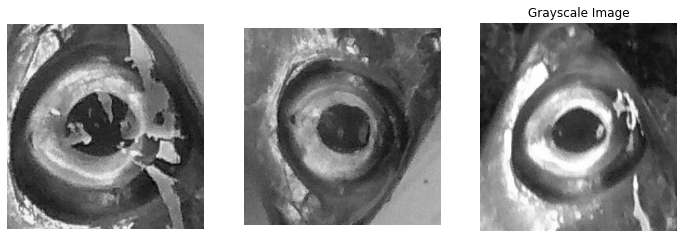

In [107]:
def konversi_ke_grayscale(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

def menampilkan_dgn_horizontal(folder_paths, jmlh_img=3):
    fig, axs = plt.subplots(1, jmlh_img, figsize=(12, 4))

    for i, folder_path in enumerate(folder_paths):
        image_files = os.listdir(folder_path)
        jmlh_img = min(jmlh_img, len(image_files))

        for j in range(jmlh_img):
            image_path = os.path.join(folder_path, image_files[j])
            grayscale_image = konversi_ke_grayscale(image_path)

            axs[j].imshow(grayscale_image, cmap='gray')
            axs[j].axis('off')

        axs[j].set_title("Grayscale Image")

    plt.show()

folder_paths = ["D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengGrayScale\Bandeng - Fresh", "D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengGrayScale\Bandeng - Highly Fresh", "D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengGrayScale\Bandeng - Not Fresh"]
menampilkan_dgn_horizontal(folder_paths, jmlh_img=3)

Cropping pada dataset Bandeng dan Sampel Outputnya

Fungsi cropping_mata_ikan menerima image_path sebagai argumen yang berisi path (lokasi) dari gambar. Fungsi ini membaca gambar dengan menggunakan cv2.imread dan mengonversinya ke grayscale dengan cv2.IMREAD_GRAYSCALE. Kemudian, thresholding diterapkan pada gambar grayscale menggunakan cv2.threshold dengan parameter threshold 128. Hasil thresholding akan menghasilkan gambar biner, di mana area mata ikan menjadi putih dan latar belakang menjadi hitam.

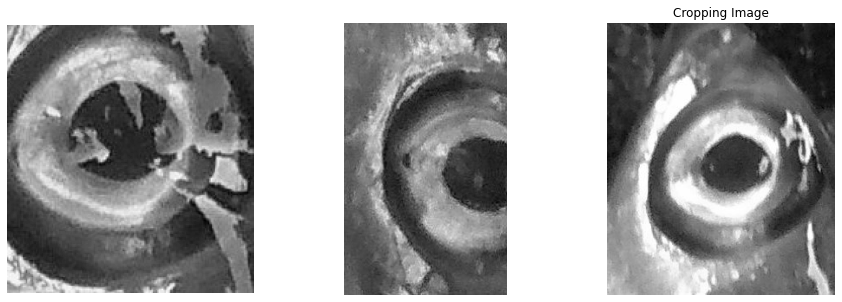

In [108]:
def cropping_mata_ikan(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour = max(contours, key=cv2.contourArea)

    x, y, w, h = cv2.boundingRect(largest_contour)

    cropping = image[y:y+h, x:x+w]

    return cropping

def menampilkan_dgn_horizontal(folder_paths, jmlh_img=3):
    fig, axs = plt.subplots(1, jmlh_img, figsize=(15, 5))

    for i, folder_path in enumerate(folder_paths):
        image_files = os.listdir(folder_path)
        jmlh_img = min(jmlh_img, len(image_files))

        for j in range(jmlh_img):
            image_path = os.path.join(folder_path, image_files[j])
            cropping = cropping_mata_ikan(image_path)

            axs[j].imshow(cropping, cmap='gray')
            axs[j].axis('off')

        axs[j].set_title("Cropping Image")

    plt.show()

folder_paths = ["D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengCropping\Bandeng - Fresh", "D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengCropping\Bandeng - Highly Fresh", "D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengCropping\Bandeng - Not Fresh"]
menampilkan_dgn_horizontal(folder_paths, jmlh_img=3)

Noise Filtering setelah Cropping

Fungsi menghilangkan_noise menerima image sebagai argumen yang merupakan gambar yang ingin dihilangkan noise-nya. Fungsi ini mengubah gambar menjadi grayscale dengan cv2.cvtColor menggunakan mode cv2.COLOR_BGR2GRAY.

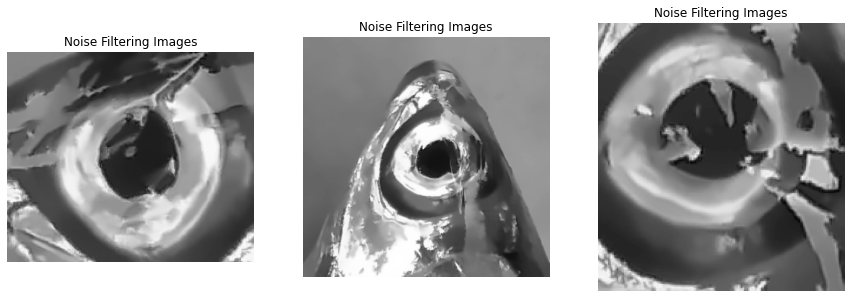

In [75]:
def menghilangkan_noise(image):
   
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    noising = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    
    return noising

def tampilan(images):
    fig = plt.figure(figsize=(15,5))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.set_title("Noise Filtering Images")
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

folders = ["D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengCropping\Bandeng - Fresh", "D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengCropping\Bandeng - Highly Fresh", "D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengCropping\Bandeng - Not Fresh"]

images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:
    
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        denoised_image = menghilangkan_noise(image)
        
        images.append(denoised_image)

tampilan(images)

Sharpening setelah dilakukan Noise Filtering

NumPy (Numerical Python) adalah pustaka populer dalam bahasa pemrograman Python yang digunakan untuk melakukan operasi numerik dan manipulasi array multidimensi. Ini adalah salah satu pustaka yang paling umum digunakan dalam komputasi ilmiah dan analisis data menggunakan Python.

Fungsi proses_sharpening menerima image sebagai argumen yang merupakan gambar yang ingin di-sharpen dimana dibuat sebuah kernel menggunakan np.array yang merupakan matriks 3x3. Kernel ini digunakan sebagai filter yang akan diterapkan pada gambar untuk memunculkan detail yang tajam

In [109]:
import numpy as np

def proses_sharpening(image):
    
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    filter_sharpening = cv2.filter2D(image, -1, kernel)
    
    return filter_sharpening

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Not Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengSharpening\Bandeng - Not Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
   
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    sharpening = proses_sharpening(gray)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, sharpening)

In [110]:
def proses_sharpening(image):
    
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    filter_sharpening = cv2.filter2D(image, -1, kernel)
    
    return filter_sharpening

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Highly Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengSharpening\Bandeng - Highly Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
   
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    sharpening = proses_sharpening(gray)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, sharpening)

In [111]:
def proses_sharpening(image):
    
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    filter_sharpening = cv2.filter2D(image, -1, kernel)
    
    return filter_sharpening

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengSharpening\Bandeng - Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
   
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    sharpening = proses_sharpening(gray)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, sharpening)

Pertama, terdapat fungsi proses_sharpening yang menerima image sebagai argumen. Fungsi ini melakukan sharpening pada gambar dengan menggunakan kernel khusus. Kernel tersebut didefinisikan sebagai matriks 3x3 dengan bobot tertentu yang membantu memunculkan detail tajam pada gambar. Fungsi ini mengembalikan gambar yang telah di-sharpen.

Selanjutnya, terdapat fungsi tampilan yang digunakan untuk menampilkan gambar-gambar hasil sharpening secara horizontal. Fungsi ini menerima images sebagai argumen, yang berisi daftar gambar hasil sharpening yang ingin ditampilkan. Setiap gambar ditampilkan dalam satu subplot dengan menggunakan plt.imshow dari Matplotlib.

Selanjutnya, terdapat variabel folders yang berisi daftar folder tempat gambar-gambar berada. Di dalam loop for, gambar-gambar dari setiap folder dibaca satu per satu. Setiap gambar kemudian di-sharpen menggunakan fungsi proses_sharpening, dan hasilnya ditambahkan ke dalam daftar images.

Terakhir, fungsi tampilan dipanggil dengan argumen images untuk menampilkan gambar-gambar hasil sharpening secara horizontal.

Secara keseluruhan, kode tersebut membaca gambar-gambar dari beberapa folder, melakukan proses sharpening pada masing-masing gambar, dan menampilkan hasil sharpening secara horizontal.

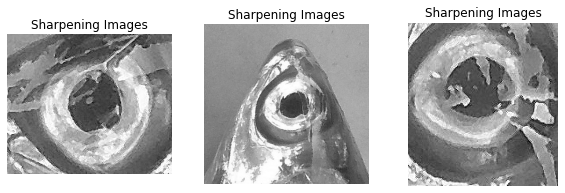

In [112]:
def proses_sharpening(image):
   
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    filter_sharpening = cv2.filter2D(image, -1, kernel)
    
    return filter_sharpening

def tampilan(images):
    fig = plt.figure(figsize=(10, 3))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.set_title("Sharpening Images")
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

folders = ['D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Fresh', 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Highly Fresh', 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Not Fresh']

images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:
    
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        sharpening = proses_sharpening(image)
        
        images.append(sharpening)

tampilan(images)


Ekualisasi histogram setelah sharpening, dilakukan untuk memperterang citra

Fungsi ini mengubah gambar ke dalam skala keabuan (grayscale) menggunakan cv2.cvtColor dari OpenCV. Selanjutnya, ekualisasi histogram diterapkan pada gambar grayscale menggunakan cv2.equalizeHist. Hasil ekualisasi histogram tersebut kemudian dikembalikan.

Selanjutnya, terdapat variabel input_folder yang berisi path folder tempat gambar-gambar berada, dan output_folder yang berisi path folder tujuan untuk menyimpan hasil ekualisasi histogram.

Menggunakan os.makedirs, folder output akan dibuat jika belum ada.

Selanjutnya, gambar-gambar dari folder input diiterasi menggunakan loop for. Setiap gambar dibaca menggunakan cv2.imread, kemudian proses ekualisasi histogram diterapkan pada gambar tersebut dengan memanggil fungsi ekualisasi_histogram. Hasil ekualisasi histogram disimpan dalam folder output dengan nama yang sama seperti gambar aslinya menggunakan cv2.imwrite.

In [55]:
def ekualisasi_histogram(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    equalisasi_hist = cv2.equalizeHist(gray)
    
    return equalisasi_hist

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Not Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Not Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    equalisasi_img = ekualisasi_histogram(image)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, equalisasi_img)

In [56]:
def ekualisasi_histogram(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    equalisasi_hist = cv2.equalizeHist(gray)
    
    return equalisasi_hist

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Highly Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Highly Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    equalisasi_img = ekualisasi_histogram(image)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, equalisasi_img)

In [57]:
def ekualisasi_histogram(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    equalisasi_hist = cv2.equalizeHist(gray)
    
    return equalisasi_hist

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Not Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Not Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    equalisasi_img = ekualisasi_histogram(image)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, equalisasi_img)

Fungsi histogram_equalization(image): Fungsi ini menerima sebuah gambar sebagai input dan mengembalikan gambar dengan histogram yang diequalisasikan. Prosesnya melibatkan konversi gambar ke skala abu-abu menggunakan cv2.cvtColor() dengan mode cv2.COLOR_BGR2GRAY, lalu melakukan equalisasi histogram menggunakan cv2.equalizeHist() pada gambar skala abu-abu tersebut. Gambar hasil equalisasi histogram dikembalikan sebagai output.

Fungsi display_images(images): Fungsi ini menerima daftar gambar (images) sebagai input dan menampilkan gambar-gambar tersebut dalam satu jendela plot. Untuk setiap gambar dalam daftar, fungsi ini membuat subplot menggunakan fig.add_subplot(), menampilkan judul subplot sebagai "Ekualisasi Histogram Images" menggunakan ax.set_title(), menampilkan gambar dalam subplot menggunakan ax.imshow(), dan menonaktifkan sumbu subplot menggunakan ax.axis('off'). Setelah iterasi selesai, fungsi ini menampilkan jendela plot dengan plt.show().

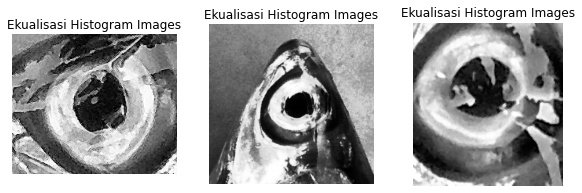

In [58]:
def histogram_equalization(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    equalisasi_hist = cv2.equalizeHist(gray)
    
    return equalisasi_hist

def display_images(images):
    fig = plt.figure(figsize=(10, 3))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.set_title("Ekualisasi Histogram Images")
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

folders = ['D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Fresh', 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Highly Fresh', 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Not Fresh']

images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:

        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        equalisasi_img = histogram_equalization(image)
        
        images.append(equalisasi_img)

display_images(images)


Setelah dilakukan ekualisasi histogram dilakukan edge detection

Fungsi edge_detection(image): Fungsi ini menerima sebuah gambar sebagai input dan mengembalikan gambar dengan tepi yang terdeteksi. Prosesnya melibatkan konversi gambar ke skala abu-abu menggunakan cv2.cvtColor() dengan mode cv2.COLOR_BGR2GRAY. Selanjutnya, metode Canny diterapkan pada gambar skala abu-abu tersebut menggunakan cv2.Canny() dengan nilai threshold lower (100) dan threshold upper (200). Hasil deteksi tepi dikembalikan sebagai output.

In [59]:
def edge_detection(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edge = cv2.Canny(gray, 100, 200)
    
    return edge

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Not Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEdgeDetection\Bandeng - Not Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
  
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    edges = edge_detection(image)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, edges)

In [60]:
def edge_detection(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edge = cv2.Canny(gray, 100, 200)
    
    return edge

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Highly Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEdgeDetection\Bandeng - Highly Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
  
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    edges = edge_detection(image)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, edges)

In [62]:
def edge_detection(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edge = cv2.Canny(gray, 100, 200)
    
    return edge

input_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Fresh'

output_folder = 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEdgeDetection\Bandeng - Fresh'

os.makedirs(output_folder, exist_ok=True)

image_files = os.listdir(input_folder)

for image_file in image_files:
  
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    edges = edge_detection(image)
    
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, edges)

Fungsi edge_detection(image): Fungsi ini menerima sebuah gambar sebagai input dan mengembalikan gambar dengan tepi yang terdeteksi. Prosesnya melibatkan konversi gambar ke skala abu-abu menggunakan cv2.cvtColor() dengan mode cv2.COLOR_BGR2GRAY. Selanjutnya, metode Canny diterapkan pada gambar skala abu-abu tersebut menggunakan cv2.Canny() dengan nilai threshold lower (100) dan threshold upper (200). Hasil deteksi tepi dikembalikan sebagai output.

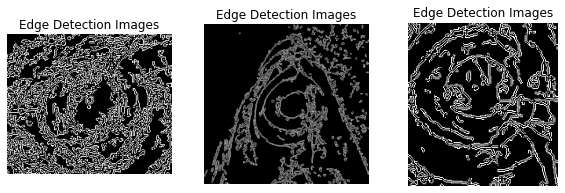

In [65]:
def edge_detection(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edges = cv2.Canny(gray, 100, 200)
    
    return edges

def tampilan(images):
    fig = plt.figure(figsize=(10, 3))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.set_title("Edge Detection Images")
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

folders = ['D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEdgeDetection\Bandeng - Fresh', 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEdgeDetection\Bandeng - Highly Fresh', 'D:\Perkuliahan\Materi Smstr 4\Praktikum PCD\TubesPCDVer3\Tubes1\DatasetBandengEdgeDetection\Bandeng - Not Fresh']

images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:
     
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        edges = edge_detection(image)
        
        images.append(edges)

tampilan(images)